<a href="https://colab.research.google.com/github/aalonsca73/in_silico_toxicology/blob/main/PCA_CEC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

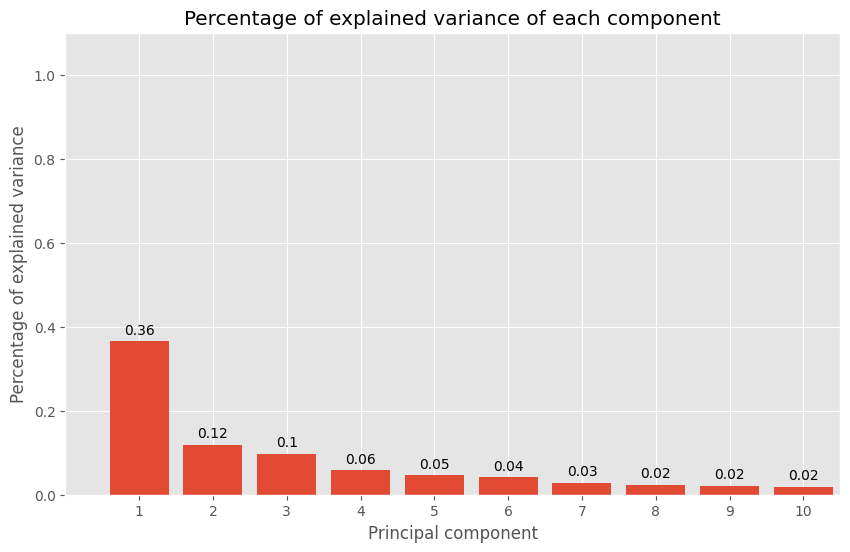

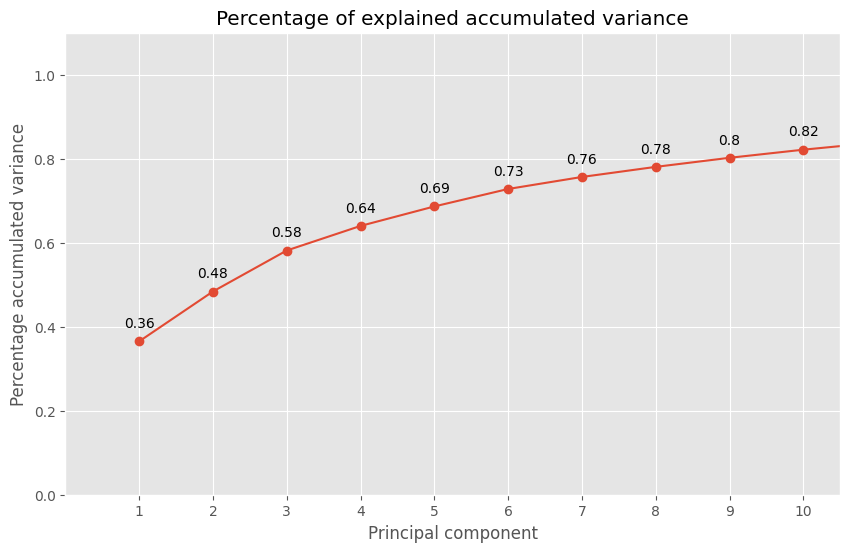

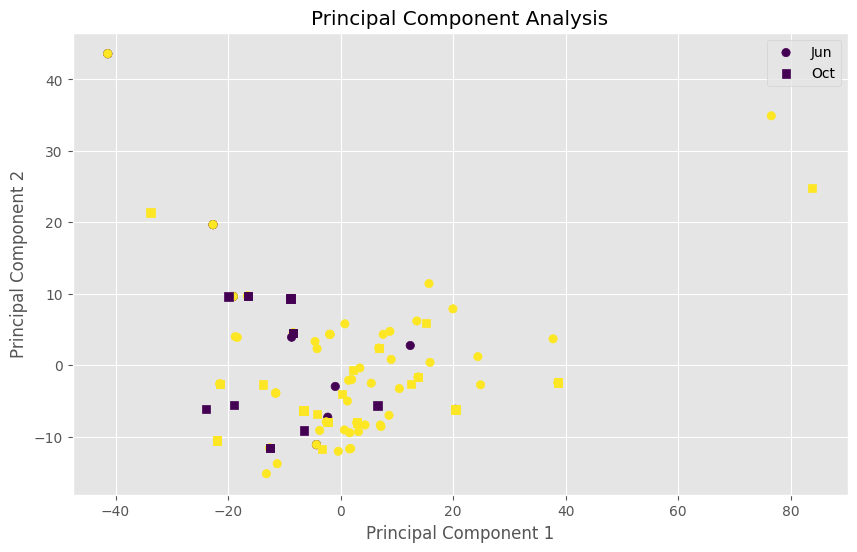

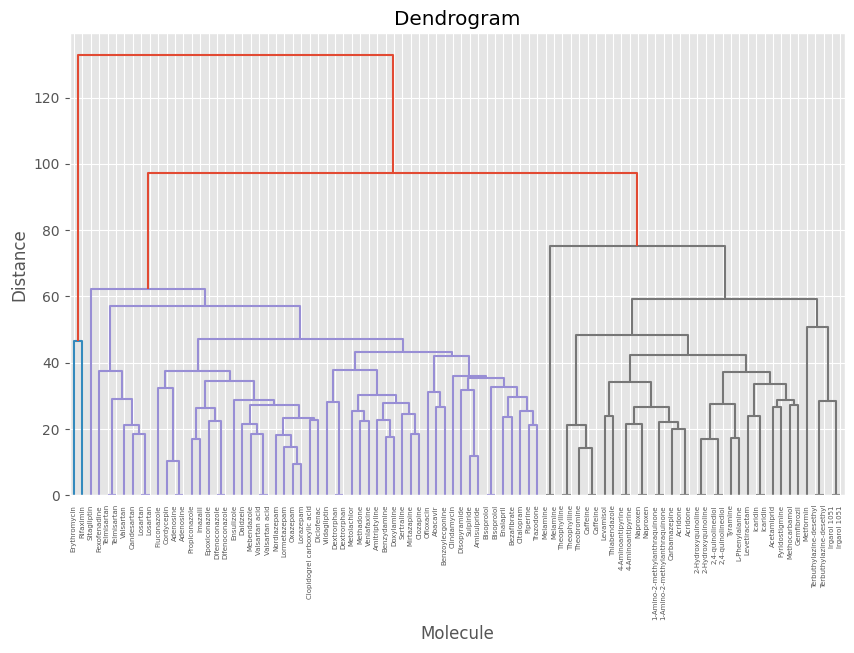

In [42]:
# Define the filename for the CSV file
filename = 'molecules_with_properties_CEC.csv'
labels_filename = 'llistes.xlsx'

# Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from scipy.cluster.hierarchy import linkage, dendrogram

# Set the style for the plot
style.use('ggplot') # or plt.style.use('ggplot')

# Read the CSV file using pandas
df = pd.read_csv(filename)
labels_df = pd.read_excel(labels_filename,sheet_name=0,header=0)

# Remove the 'SMILES' column from the DataFrame
filtered_df = df.drop(columns="SMILES")
# Set the 'Name' column as the index
filtered_df = filtered_df.set_index('Name')

# Set the 'CEC' column as the index in labels_df
labels_df = labels_df.set_index('CEC')

# Find compounds that appear in both dataframes
common_compounds = filtered_df.index.intersection(labels_df.index)

# Filter to keep only the labels of common compounds
filtered_labels_df = labels_df.loc[common_compounds]




# Training PCA model with scaled data
pca_pipe = make_pipeline(StandardScaler(),PCA())
pca_pipe.fit(filtered_df)

# Extraction of the trained model from the pipeline
pca_model = pca_pipe.named_steps['pca']

# Transformation of the scaled data to obtain Principal Components
transformed_data = pca_pipe.transform(filtered_df)

# Convert array to dataframe
PCA = pd.DataFrame(data=transformed_data,index=filtered_df.index)

# Percentage of explained variance of each component
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
ax.bar(x=np.arange(pca_model.n_components_)+1,
       height = pca_model.explained_variance_ratio_)

# Add labels to the bars
for x,y in zip(np.arange(len(filtered_df.columns))+1, pca_model.explained_variance_ratio_):
    label = round(y,2)
    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,5),ha='center')

ax.set_xticks(np.arange(pca_model.n_components_)+1)
ax.set_xlim(0,10.5)
ax.set_ylim(0,1.1)
ax.set_title('Percentage of explained variance of each component')
ax.set_xlabel('Principal component')
ax.set_ylabel('Percentage of explained variance')

# Proportion of accumulated variance
prop_var_accum = pca_model.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,6))
ax.plot(np.arange(len(pca_model.components_))+1,
        pca_model.explained_variance_ratio_.cumsum(), marker = 'o')

# Add labels to the data points
for x,y in zip(np.arange(len(filtered_df.columns))+1,pca_model.explained_variance_ratio_.cumsum()):
  label = round(y, 2)
  ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')

ax.set_xticks(np.arange(pca_model.n_components_)+1)
ax.set_xlim(0,10.5)
ax.set_ylim(0,1.1)
ax.set_title('Percentage of explained accumulated variance')
ax.set_xlabel('Principal component')
ax.set_ylabel('Percentage accumulated variance')

# Add 'Campaña' labels to the PCA DataFrame
PCA_labels = pd.merge(PCA,filtered_labels_df,on=PCA.index)

# PCA
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# Filter rows for 'Campaña'=='Jun'
jun_data = PCA_labels.query("Campaña == 'Jun'")
label_color_dict_jun = {label:idx for idx,label in enumerate(np.unique(jun_data['Cluster']))}
cvec_jun = [label_color_dict_jun[word] for word in jun_data['Cluster']]
ax.scatter(jun_data.loc[:, 0], jun_data.loc[:, 1], c=cvec_jun, marker='o', label='Jun')

# Filter rows for 'Campaña'=='Oct'
oct_data = PCA_labels.query("Campaña == 'Oct'")
label_color_dict_oct = {label:idx for idx,label in enumerate(np.unique(oct_data['Cluster']))}
cvec_oct = [label_color_dict_oct[word] for word in oct_data['Cluster']]
ax.scatter(oct_data.loc[:, 0], oct_data.loc[:, 1], c=cvec_oct, marker='s', label='Oct')

ax.set_title('Principal Component Analysis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.legend()  # Add legend to distinguish between 'Jun' and 'Oct'

# Clustering
complete_clustering = linkage(PCA,method="complete",metric="euclidean")
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))
dendrogram(complete_clustering,labels=filtered_df.index)

ax.set_title('Dendrogram')
ax.set_xlabel('Molecule')
ax.set_ylabel('Distance')

# Show the plots
plt.show()